In [121]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
def ensure_numeric(df,col):
  df[col] = df[col].apply(lambda x: pd.to_numeric(x,errors="coerce"))
  return df
def ensure_all_numeric(df,cols):
  for col in cols:
    df = ensure_numeric(df,col)
  return df

In [123]:
satis_verisi = pd.read_csv("drive/MyDrive/satis_verisi_5000.csv")
musteri_verisi = pd.read_csv("drive/MyDrive/musteri_verisi_5000_utf8.csv")

# Görev 1: Veri Temizleme ve Manipülasyonu

numeric_col_names_satis = ['fiyat', 'adet', 'toplam_satis']
numeric_col_names_musteri = ['harcama_miktari', 'yas']
merged_numeric_names = ['harcama_miktari', 'yas','fiyat', 'adet', 'toplam_satis']

satis_verisi = ensure_all_numeric(satis_verisi,numeric_col_names_satis)
musteri_verisi = ensure_all_numeric(musteri_verisi,numeric_col_names_musteri)
satis_verisi["tarih"] = satis_verisi["tarih"].apply(pd.to_datetime)

numeric_cols_satis = satis_verisi[numeric_col_names_satis]
numeric_cols_musteri = musteri_verisi[numeric_col_names_musteri]

missing_values_satis = satis_verisi.isnull().sum()
missing_values_musteri = musteri_verisi.isnull().sum()

satis_stats = numeric_cols_satis.describe()
musteri_stats = numeric_cols_musteri.describe()

missing_values_satis, missing_values_musteri, satis_stats, musteri_stats


(Unnamed: 0       0
 tarih            0
 ürün_kodu        0
 ürün_adi         0
 kategori         0
 fiyat           42
 adet             0
 toplam_satis     4
 musteri_id       0
 dtype: int64,
 musteri_id         0
 isim               0
 cinsiyet           0
 yas                0
 sehir              0
 harcama_miktari    0
 dtype: int64,
              fiyat         adet  toplam_satis
 count  4958.000000  5000.000000  4.996000e+03
 mean    746.934887    10.071800  1.374613e+15
 std     428.603635     5.461264  5.717351e+15
 min      13.530000     1.000000  2.228000e+01
 25%     372.950000     5.000000  2.289220e+03
 50%     742.480000    10.000000  6.643450e+03
 75%    1117.597500    15.000000  1.411417e+04
 max    1499.930000    19.000000  7.175480e+16,
        harcama_miktari          yas
 count      5000.000000  5000.000000
 mean       2554.959014    43.704000
 std        1415.329144    15.083086
 min         100.230000    18.000000
 25%        1313.147500    31.000000
 50%        

In [124]:
print(satis_verisi.columns)
print(musteri_verisi.columns)
merged_data  = musteri_verisi.merge(satis_verisi,on="musteri_id")
merged_data.head()

Index(['Unnamed: 0', 'tarih', 'ürün_kodu', 'ürün_adi', 'kategori', 'fiyat',
       'adet', 'toplam_satis', 'musteri_id'],
      dtype='object')
Index(['musteri_id', 'isim', 'cinsiyet', 'yas', 'sehir', 'harcama_miktari'], dtype='object')


,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,3902,Candeniz,Erkek,61,Konya,867.20,83,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18,16173.54
1,3902,Candeniz,Erkek,61,Konya,867.20,4007,2024-06-06,P087,Kulaklık,Elektronik,508.58,6,3051.48
2,2080,Gözel,Erkek,64,Adana,2020.97,2410,2023-03-24,P037,Fırın,Ev Aletleri,1454.80,5,7274.00
3,2080,Gözel,Erkek,64,Adana,2020.97,2775,2023-12-07,P018,Telefon,Elektronik,369.09,4,1476.36
4,7901,Erdogan,Kadın,63,İstanbul,4334.16,1552,2023-03-22,P024,Bilgisayar,Elektronik,913.23,3,2739.69


In [125]:
# IQR yöntemiyle aykırı değerleri tespit ve temizleme fonksiyonu
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Harcama miktarı, yaş ve fiyat kolonlarında aykırı değerleri temizleme
merged_data_clean = remove_outliers(merged_data, "harcama_miktari")
merged_data_clean = remove_outliers(merged_data_clean, "yas")
merged_data_clean = remove_outliers(merged_data_clean,"toplam_satis")
merged_data_clean = remove_outliers(merged_data_clean, "fiyat")

numeric_cols = merged_data_clean[merged_numeric_names]
merged_data_clean[numeric_cols.columns] = numeric_cols.apply(lambda col: col.fillna(col.mean()))

# Temizlenmiş veri setlerinin boyutlarını kontrol edelim
print(merged_data_clean.shape)
print(merged_data_clean.isnull().sum())


(4496, 14)
musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
Unnamed: 0         0
tarih              0
ürün_kodu          0
ürün_adi           0
kategori           0
fiyat              0
adet               0
toplam_satis       0
dtype: int64


<ipython-input-126-b8363f528453>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df[value].resample(interval).sum()


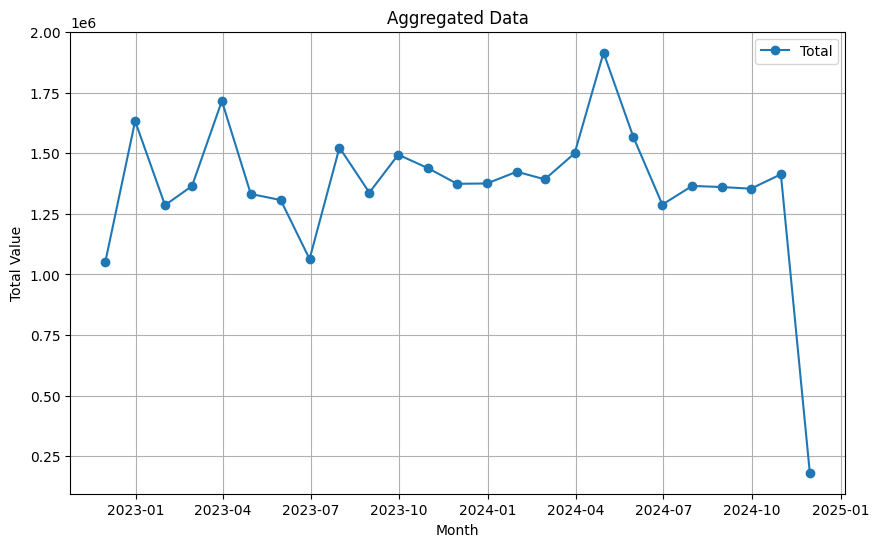

<ipython-input-126-b8363f528453>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df[value].resample(interval).sum()


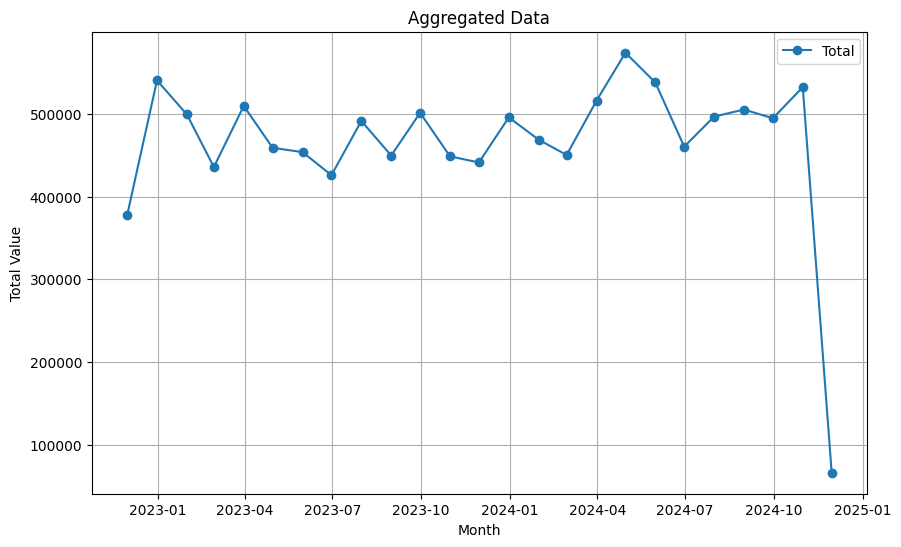

In [126]:
def plot_timeseries(df,value,interval): #Aggregates daily data into monthly or weekly data
  if df.index.name != "tarih":
    df.set_index('tarih', inplace=True)
  monthly_data = df[value].resample(interval).sum()
  plt.figure(figsize=(10, 6))
  plt.plot(monthly_data.index, monthly_data.values, marker='o', label='Total')
  plt.title('Aggregated Data')
  plt.xlabel('Month')
  plt.ylabel('Total Value')
  plt.grid(True)
  plt.legend()
  plt.show()
  df.reset_index(inplace = True)

plot_timeseries(merged_data_clean,"toplam_satis","M")
plot_timeseries(merged_data_clean,"harcama_miktari","M")

In [127]:
def find_first_and_last(df): #finds the first and last occurences of a month

    date_column = "tarih"
    df[date_column] = pd.to_datetime(df[date_column])
    grouped = df.groupby(df[date_column].dt.to_period('M'))
    result = grouped[date_column].agg(['min', 'max']).reset_index()
    result.rename(columns={'min': 'First Day of Sales', 'max': 'Last Day of Sales'}, inplace=True)

    return result

In [128]:
find_first_and_last(merged_data_clean)

,tarih,First Day of Sales,Last Day of Sales
0,2022-11,2022-11-06,2022-11-30
1,2022-12,2022-12-01,2022-12-31
2,2023-01,2023-01-01,2023-01-31
3,2023-02,2023-02-01,2023-02-28
4,2023-03,2023-03-01,2023-03-31
5,2023-04,2023-04-01,2023-04-30
6,2023-05,2023-05-01,2023-05-31
7,2023-06,2023-06-01,2023-06-30
8,2023-07,2023-07-01,2023-07-31
9,2023-08,2023-08-01,2023-08-31


kategori
Elektronik         16584885.43
Ev Aletleri         3518210.84
Giyim               3554940.37
Kırtasiye           7118395.55
Mutfak Ürünleri     3281188.50
Name: toplam_satis, dtype: float64
tarih
2022-11-06     16554.33
2022-11-13    257445.41
2022-11-20    327190.00
2022-11-27    305309.38
2022-12-04    352525.85
                ...    
2024-10-13    260777.40
2024-10-20    294569.55
2024-10-27    400001.12
2024-11-03    268815.66
2024-11-10     70866.81
Freq: W-SUN, Name: toplam_satis, Length: 106, dtype: float64
106


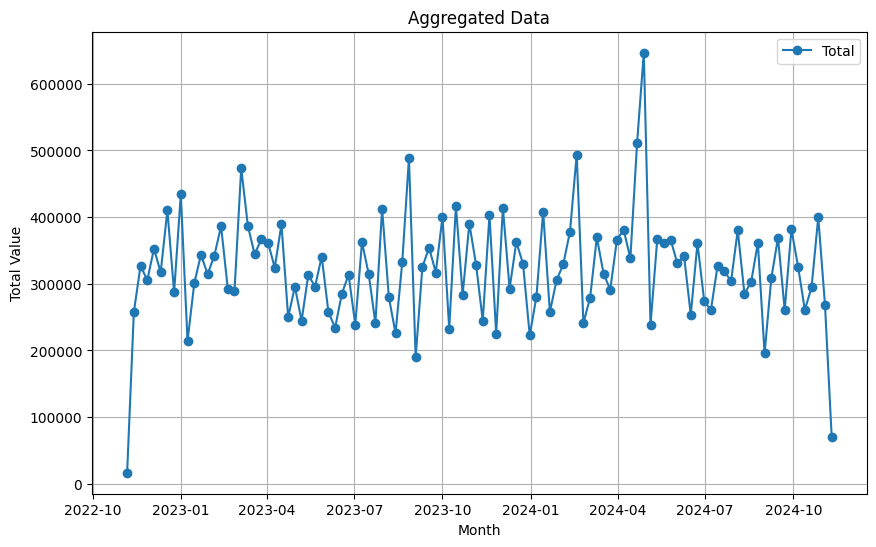

In [129]:
merged_data_clean.set_index('tarih', inplace=True)
result = merged_data_clean.groupby("kategori")["toplam_satis"].sum()
print(result)
weekly_sum = merged_data_clean.resample('W')["toplam_satis"].sum()
print(weekly_sum)
print(weekly_sum.count())
plot_timeseries(merged_data_clean,"toplam_satis","W")
merged_data_clean.reset_index(inplace = True)

In [130]:
# Yaş Analizi
def age_interval(age):
   if 18 <= age <= 25:
    return "18-25"
   elif 26 <= age <= 35:
    return "26-35"
   elif 36 <= age <= 50:
    return "36-50"
   else:
    return "50+"
merged_data_clean["yas_araligi"] = merged_data_clean["yas"].apply(lambda x: age_interval(x))

result = merged_data_clean.groupby("yas_araligi")["toplam_satis"].sum()
result

,toplam_satis
yas_araligi,
18-25,5471518.65
26-35,6111508.30
36-50,10159127.00
50+,12315466.74


In [131]:
merged_data_clean.columns

Index(['index', 'tarih', 'musteri_id', 'isim', 'cinsiyet', 'yas', 'sehir',
       'harcama_miktari', 'Unnamed: 0', 'ürün_kodu', 'ürün_adi', 'kategori',
       'fiyat', 'adet', 'toplam_satis', 'yas_araligi'],
      dtype='object')

In [132]:
merged_data_clean.groupby(["cinsiyet","ürün_adi","yas_araligi"])["harcama_miktari"].sum().sort_values(ascending = False).head()

cinsiyet  ürün_adi   yas_araligi
Kadın     Kalem      50+            257851.48
Erkek     Kalem      50+            245053.49
Kadın     Telefon    50+            244046.80
          Su Şişesi  50+            238511.70
Erkek     Kulaklık   50+            235723.89
Name: harcama_miktari, dtype: float64

In [141]:
merged_data_clean.groupby(["sehir","cinsiyet"])["toplam_satis"].sum().sort_values(ascending = False)

sehir      cinsiyet
İzmir      Kadın       2479598.06
Konya      Erkek       2409258.82
Gaziantep  Erkek       2362161.49
Bursa      Erkek       2299265.73
           Kadın       2284575.80
Ankara     Kadın       2275143.77
Antalya    Kadın       2230514.21
           Erkek       2151258.70
Adana      Kadın       2098161.83
Gaziantep  Kadın       2015929.72
Adana      Erkek       1995046.33
Ankara     Erkek       1985226.99
İzmir      Erkek       1920097.98
İstanbul   Kadın       1890921.53
           Erkek       1864823.48
Konya      Kadın       1795636.25
Name: toplam_satis, dtype: float64

In [134]:
def monthly_sale_change_per_category(df):

  df['ay'] = df['tarih'].dt.to_period('M')
  monthly_sales = df.groupby(['kategori', 'ay'])['toplam_satis'].sum().reset_index()
  monthly_sales['yuzdelik_degisim'] = monthly_sales.groupby('kategori')['toplam_satis'].pct_change() * 100
  monthly_sales['yuzdelik_degisim'] = monthly_sales['yuzdelik_degisim'].fillna(0)
  return monthly_sales

def monthly_sale_change(df):
  df['ay'] = df['tarih'].dt.to_period('M')
  monthly_sales = df.groupby('ay')['toplam_satis'].sum().reset_index()
  monthly_sales['yuzdelik_degisim'] = monthly_sales['toplam_satis'].pct_change() * 100
  monthly_sales['yuzdelik_degisim'] = monthly_sales['yuzdelik_degisim'].fillna(0)
  return monthly_sales

monthly_categorical_sales = monthly_sale_change_per_category(merged_data_clean)
monthly_sales = monthly_sale_change(merged_data_clean)
monthly_categorical_sales.groupby("kategori").head()

# monthly_sales değişkeni toplam satış değişimini tutuyor, monthly_categorical_sales değişkeni kategoriye göre aylık değişimleri tutuyor

,kategori,ay,toplam_satis,yuzdelik_degisim
0,Elektronik,2022-11,554163.31,0.000000
1,Elektronik,2022-12,754160.91,36.090011
2,Elektronik,2023-01,697797.31,-7.473684
3,Elektronik,2023-02,573762.51,-17.775190
4,Elektronik,2023-03,810516.47,41.263407
25,Ev Aletleri,2022-11,95992.06,0.000000
26,Ev Aletleri,2022-12,222368.37,131.652878
27,Ev Aletleri,2023-01,149097.02,-32.950437
28,Ev Aletleri,2023-02,191387.95,28.364705
29,Ev Aletleri,2023-03,168815.66,-11.793997


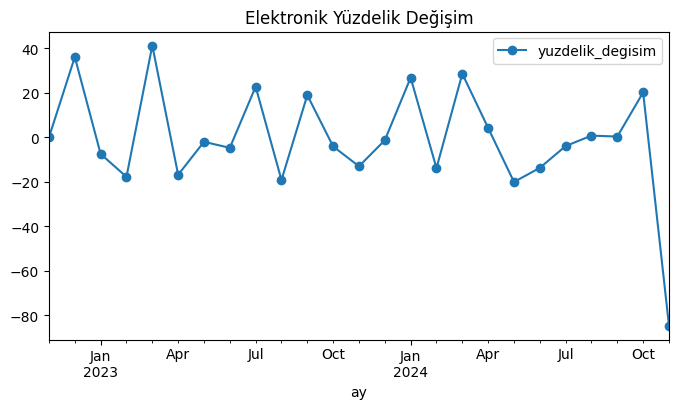

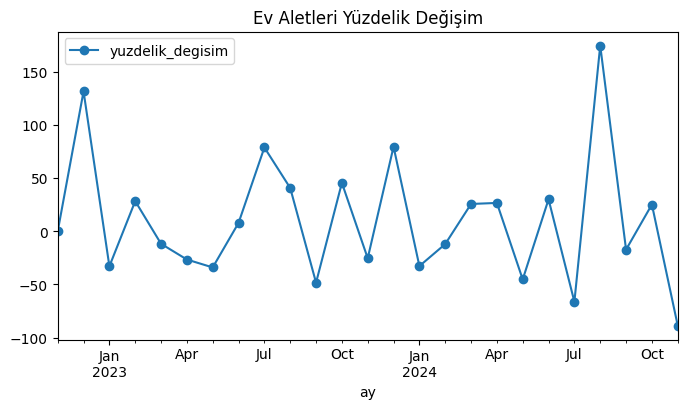

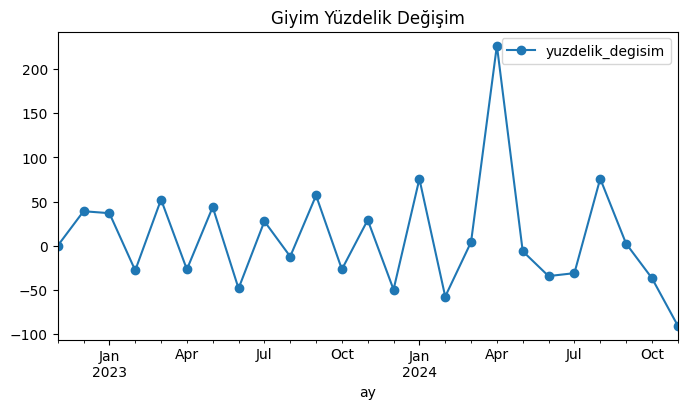

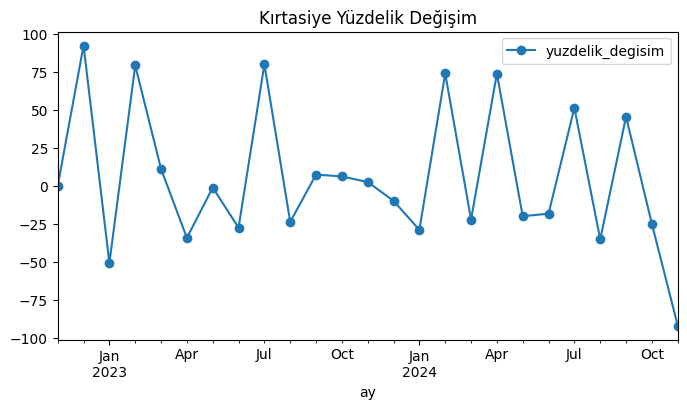

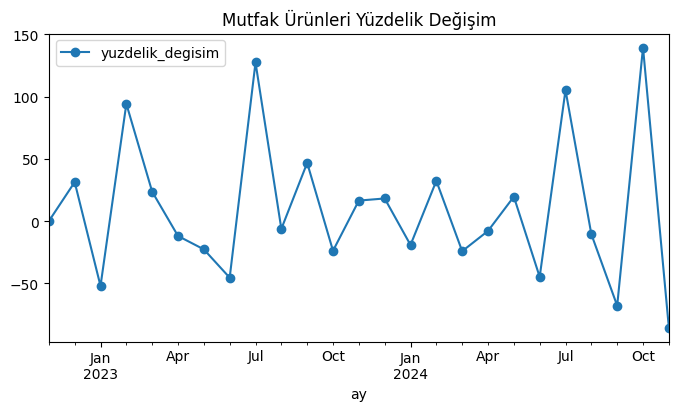

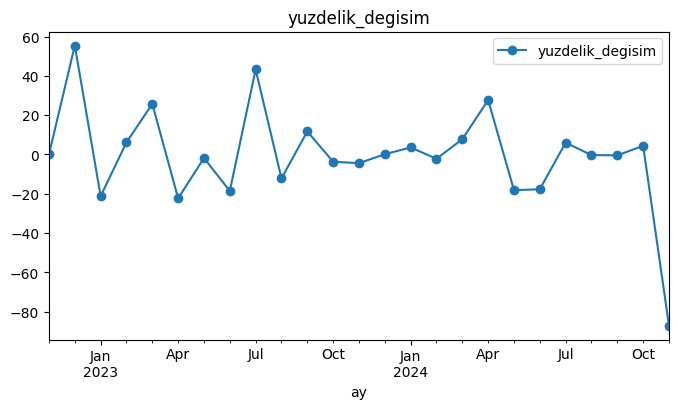

In [135]:
def plot_data(df,x,y):
  df.plot(
      kind='line',
      x=f'{x}',
      y=f'{y}',
      figsize=(8, 4),
      title=f'{y}',
      marker='o'
  )
def plot_category(category_name):
  category_data = monthly_categorical_sales.query(f'kategori == "{category_name}"')
  category_data.plot(
      kind='line',
      x='ay',
      y='yuzdelik_degisim',
      figsize=(8, 4),
      title=f'{category_name} Yüzdelik Değişim',
      marker='o'
  )
  plt.show()

for category in monthly_categorical_sales["kategori"].unique():   # Kategori başına aylık yüzde değişim grafiklerini bastırır
  plot_category(category)

plot_data(monthly_sales,"ay","yuzdelik_degisim") #toplam satışların aylık değişimini bastırır

In [136]:
#Pareto Analizi
data = merged_data_clean.copy(deep = True)
pareto_data = data.groupby('ürün_adi')['toplam_satis'].sum().sort_values(ascending=False)
pareto_data_cumsum = pareto_data.cumsum() / pareto_data.sum()
pareto_cutoff = pareto_data_cumsum[pareto_data_cumsum <= 0.80]
pareto_data_cumsum.name = 'cumulative_percentage'
pareto_cutoff.name = 'cumulative_percentage'
pareto_data_cumsum, pareto_cutoff

(ürün_adi
 Telefon       0.107828
 Kalem         0.213561
 Çanta         0.317941
 Fırın         0.421243
 Defter        0.524520
 Mouse         0.624531
 Su Şişesi     0.720873
 Bilgisayar    0.815196
 Kulaklık      0.908943
 Klima         1.000000
 Name: cumulative_percentage, dtype: float64,
 ürün_adi
 Telefon      0.107828
 Kalem        0.213561
 Çanta        0.317941
 Fırın        0.421243
 Defter       0.524520
 Mouse        0.624531
 Su Şişesi    0.720873
 Name: cumulative_percentage, dtype: float64)

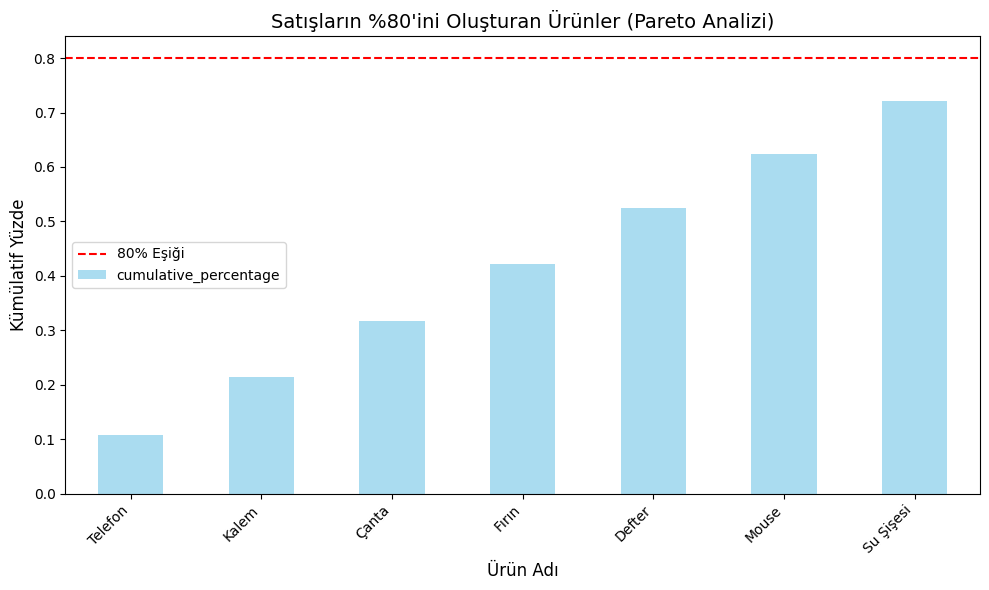

In [156]:
plt.figure(figsize=(10, 6))
pareto_cutoff.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Satışların %80'ini Oluşturan Ürünler (Pareto Analizi)", fontsize=14)
plt.xlabel("Ürün Adı", fontsize=12)
plt.ylabel("Kümülatif Yüzde", fontsize=12)
plt.axhline(y=0.8, color='red', linestyle='--', label="80% Eşiği")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [154]:
def calc_retention(df): # Bir müşterinin daha önceden gelip gelmediği bilgisi olmadığı için, elimizdeki datada her müşterinin ilk datasının ilk alışverişi olduğunu varsayıyoruz
  value_counts = df["musteri_id"].value_counts()
  single_occurrence_values = value_counts[value_counts == 1]
  retention_rate = 1 - single_occurrence_values.count()/value_counts.count()
  return retention_rate
merged_data_clean.groupby(["yas_araligi","sehir"]).apply(calc_retention).sort_values(ascending=False)

<ipython-input-154-d04e903fe25c>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data_clean.groupby(["yas_araligi","sehir"]).apply(calc_retention).sort_values(ascending=False)


yas_araligi  sehir    
26-35        Bursa        0.603448
18-25        Bursa        0.500000
36-50        Gaziantep    0.455357
             İzmir        0.443478
             Bursa        0.437500
26-35        Ankara       0.430769
50+          Ankara       0.426573
36-50        Antalya      0.422414
             Ankara       0.405941
26-35        Antalya      0.402985
50+          Konya        0.402878
18-25        İzmir        0.400000
26-35        Konya        0.397059
36-50        Konya        0.389474
18-25        Ankara       0.384615
             Adana        0.381818
50+          İstanbul     0.380952
18-25        Antalya      0.380952
26-35        Adana        0.376812
50+          Adana        0.375000
18-25        İstanbul     0.370968
50+          Antalya      0.369565
26-35        İstanbul     0.358209
50+          Bursa        0.357616
26-35        İzmir        0.357143
50+          Gaziantep    0.356643
             İzmir        0.356061
18-25        Gaziantep    0.352941
             Konya        0.343284
36-50        Adana        0.339286
26-35        Gaziantep    0.328571
36-50        İstanbul     0.326531
dtype: float64

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


data['tarih'] = pd.to_datetime(data['tarih'])

weekly_sales = data.groupby(data['tarih'].dt.to_period('W-SUN'))['toplam_satis'].sum().reset_index()
weekly_sales['tarih'] = weekly_sales['tarih'].apply(lambda x: x.start_time)

X = pd.to_datetime(weekly_sales['tarih']).map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = weekly_sales['toplam_satis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("RMSE (Root Mean Squared Error):", rmse)
print("Tahmin Edilen Haftalık Satışlar:", y_pred[:10])
print("Tahmin Edilen Haftalık Satışlar:",y_pred)

RMSE (Root Mean Squared Error): 94612.24933508928
Tahmin Edilen Haftalık Satışlar: [314060.13190935 325346.60300322 326099.03440948 316442.8313625
 314436.34761248 318449.31511252 322838.49831569 322462.28261256
 314937.96854998 325221.19776884]
Tahmin Edilen Haftalık Satışlar: [314060.13190935 325346.60300322 326099.03440948 316442.8313625
 314436.34761248 318449.31511252 322838.49831569 322462.28261256
 314937.96854998 325221.19776884 320706.60933129 321333.63550318
 326600.65534698 316819.04706563 324343.36112821 318574.7203469
 318198.50464377 316693.64183125 319703.36745628 321082.82503442
 325095.79253447 316568.23659687]


In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


features = ['yas', 'cinsiyet', 'sehir']
target = 'harcama_miktari'
X = data[features]
y = data[target]
categorical_features = ['cinsiyet', 'sehir']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Performansı:")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² (R-Squared): {r2}")
print("\nTahmin Edilen Harcamalar (İlk 10):", y_pred[:10])


Model Performansı:
RMSE (Root Mean Squared Error): 1413.488452443051
R² (R-Squared): 0.0005871091168947462

Tahmin Edilen Harcamalar (İlk 10): [2732.58838454 2653.78772541 2427.19786105 2470.73722929 2431.12514041
 2550.44060689 2644.03237482 2697.63176296 2701.63247205 2553.04144216]
